In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Lab 5 -- Nebular HII regions

In this lab we will explore the physics of photoionized regions, which are seen surrounding newly formed stars or white dwarfs.

### 1. Strömgren sphere of ionized gas surrounding a massive star

Consider a newly formed massive star radiating a total ionizing ($h\nu > 13.6 \, \rm eV$) photon rate of $Q_*$, which is surrounded by a medium with hydrogen number density $n_H$. 

Assume that within some spherical volume (the "Strömgren sphere"), the hydrogen atoms absorb (and are ionized by) every single one of these photons, resulting in an entirely ionized gas, while outside of this volume the gas is entirely neutral. By setting the ionization and recombination rates equal within that volume, calculate its radius $R_{\rm st}$ (the "Strömgren radius"). 

$[\textit{Hint: } \textrm{What are the units of Q? What about the units of recombination rate?}]$
$[\textrm{If every photon in the inner region results in an ionization what is the ionization rate?}]$

Like in the pre-lab video, you can write the result in terms of the hydrogen recombination coefficient, $\alpha_H$. Do your scalings of the Strömgren radius with $Q_*$ and $n_H$ make sense?

### Calculation of $Q_\star$ and $R_{st}$

From the pre-lab video:
$$
Q_\star = \frac{8\pi^2R^2}{c^2}\left(\frac{kT}{h}\right)^3e^{-u_i}(2+2u_i+u_i^2)
$$
where
$$
u_i = \frac{h\nu_i}{kT}
$$

__What are the units of Q?__

>The two terms comprising $u_i$ are in units of $erg$ so their ratio is dimensionless. This makes the expression $e^{-u_i}(2+2u_i+u_i^2)$ dimensionless also.
The term: $\frac{8\pi^2R^2}{c^2}$ works out to units of $s^{2}$; the ratio: $\left(\frac{kT}{h}\right)^3$ works out to $\frac{erg^3}{erg^3s^3}$ or $s^{-3}$.
The product of these three terms is then $s^{-1}$ which implies that $Q_*$ is in units of $\# s^{-1}$ or particles per second.

__What about the units of recombination rate?__

>Recombination Rate:
$$
\mathscr{R}_{rec} = n_e n X \alpha_i^\beta(T)
$$
>where both $n_e$ and $n$ are both number densities (units = $cm^{-3}$) so their product has units of $cm^{-6}$; X is a dimensionless fraction and $\alpha_i^\beta(T)$ returns a quantity in $cm^3s^{-1}$ (See Maoz, page 123). Then $\mathscr{R_{rec}}$ has units of $cm^{-3} s^{-1}$, i.e. a number density.

__If every photon in the inner region results in an ionization what is the ionization rate?__

>$Q_\star$ is the rate of generation of photons with sufficient energy to cause ionization. If every photon gets absorbed and therefore ionizes that which absorbed it, then the ionization rate is equal to the photon generation rate.  In other words the ionization rate is $Q_\star$

### Calculation of Stromgren Sphere Radius $R_{st}$

Within the _Stromgren Sphere_ every photon that is emitted by the central star ionizes a hydrogen atom, whose newly freed electron recombines with a previously ionized atom. Therefore the rate of electrons recombining must equal the number of photons being emitted per unit of time if the sphere is to remain in equilibrium.
The recominbination rate is: $\mathscr{R} = n_e n X \alpha_i^\beta(T)$ which is a _density_, i.e. recombinations per unit time per unit volume.  This density needs to be multiplied by the volume of the _Stromgren Sphere_ to get the _total_ rate of recombinations which can then be set to the (total) rate of photon generation $Q_\star$.
Thus:
$$
\begin{align}
Q_\star &= V  \mathscr{R} \\
&= \frac{4}{3}\pi R_{st}^3 n_e n X \alpha_i^\beta(T)
\end{align}
$$

Since we're assuming pure Hydrogen, the number of electrons $n_e$ equals the number of ions (protons) $n$. Then the equation above can be solved for $R_{st}$ and written as:
$$
R_{st} = \left( \frac{3Q_\star} {4\pi n^2 \alpha_i^\beta(T)} \right)^{\frac{1}{3}}
$$

__Do your scalings of the Strömgren radius with $Q_*$ and $n_H$ make sense?__

>Stromgren Radius $R_{st}$ scales with $Q_{\star}^\frac{1}{3}$ meaning the higher the photon generation and recombination rate, the radius of the sphere increases by the cube root.  This make sense (to me!) since more photons will require more particles thus more volume thus more radius to absorb them. The addional particles will come at a raidus that is greater than the initial radius.



>The Stromgren Radius scales inversely with the square of the particle density ($n$).  This also makes intuitive sense as an increased particle density implies that a smaller volume and thus smaller radius will contain sufficient number of particles to absorb a given photon emission rate $Q_{\star}$.

In [6]:

#constants and conversions:
h = 6.626e-27 # erg s
eV = 1.602e-12 # erg per eV
c = 2.998e10 #cm s^-1
#boltzmann's constant
k =	1.3807e-16 # cm2 g s-2 K-1 (erg K-1)
angstrom_per_cm = 10e8
pc_per_cm = 3.24078e-19

def calculate_u_i(nu_i, T):
    """
    nu_i in hz; T in Kelvin
    """
    return h*nu_i/(k*T)


def Q_star(T, R, ionization_energy = 13.6):

    #calc the ionization frequency:
    photon_e = ionization_energy * eV
    nu_i =  photon_e /h #ionization freq in hertz

    u_i = calculate_u_i(nu_i, T)

    term1 = 8*np.pi**2*R**2/c**2
    term2 = np.power(k*T/h, 3.0)
    term3 = np.exp(-u_i)*(2+2*u_i+u_i**2)

    #print(f'nu_i:{nu_i:.0f}, u_i: {u_i:.0f}')
    #print(f'term1: {term1}, term2: {term2}, term3: {term3}')

    q_star = term1*term2*term3

    return q_star

def stromgren_radius(R,T,  q_star = None, ionization_energy = 13.6,  particle_rho = 1e2, alpha = 3.3e-13):

    numerator = 3*(q_star if q_star is not None else Q_star(R=R, T=T, ionization_energy=ionization_energy))
    denominator = 4*np.pi*particle_rho**2*alpha
    r_st = np.power(numerator/denominator, 1.0/3.0)

    return r_st

def mean_free_path(sigma, particle_rho):
    mfp = 1.0/(sigma*particle_rho)
    return mfp


### 2. Typical size of a photoionized nebula

Assuming a star of effective (surface) temperature $T = 3\times10^4$ K and radius $R = 2\times10^{11}$ cm, use the approximate expression from the pre-lab video to calculate the integrated ionizing photon rate $Q_*$ for hydrogen, with ionization energy of $h \nu_i = 13.6$ eV.

Then assuming $n_H = 10^2 \, \rm cm^{-3}$ and $\alpha_H = 3.3\times10^{-13} \, \rm cm^3 \, \rm s^{-1}$, calculate the Strömgren radius. How large is the ionized nebula compared to the size of the massive star? How about compared to the width of a Galactic spiral arm of $\simeq 1$ kpc?


In [13]:
R = 2e11

q_star = Q_star(R=R,T=3e4, ionization_energy=13.6)
print(f'Q_star: {q_star:.2e} particles per second')

r_st = stromgren_radius(T=3e4, R=R, ionization_energy=13.6, particle_rho=1e2, alpha=3.3e-13)
r_st_pc = r_st*pc_per_cm

print(f'Ionized nebula is {r_st/R:.2e} times as big (in radius) as the massive star')
print(f'r_st: {r_st:.2e} cm, or {r_st_pc:.2f} pc, which is {100.0*r_st_pc/1000.0:.2f} % spiral arm')

Q_star: 1.79e+47 particles per second
Ionized nebula is 1.17e+07 times as big (in radius) as the massive star
r_st: 2.35e+18 cm, or 0.76 pc, which is 0.08 % spiral arm


### 3. Thickness of the transition from ionized to neutral

The thickness of the boundary where the gas goes from nearly fully ionized to neutral can be estimated as the mean free path of an ionizing photon in the neutral region. Using $\sigma_0 = 6.3 \times 10^{-18} \, \rm cm^2$, calculate this width and compare with your value of $R_{\rm st}$ from part 2.

How does the result compare to the assumption above of a very sharp transition from fully ionized to neutral gas?

In [5]:
mfp = mean_free_path(sigma=6.3e-18, particle_rho =  1e2)

print(f'Mean Free Path: {mfp:.2e} cm, which is {100.0*(mfp/r_st):.2f}% of the Stromgren Radius')

Mean Free Path: 1.59e+15 cm, which is 0.07% of the Stromgren Radius


__How does the result compare to the assumption above of a very sharp transition from fully ionized to neutral gas?__
> The mean free path is less that one-tenth of one percent of the radius of the Stromgren Sphere. This suggests a __very sharp__ boundry of the sphere.

### 4. Relative size of hydrogen and helium ionization zones

Using the Strömgren sphere model, calculate the ratio of the radius of a helium to hydrogen ionization zone in terms of their relative number of ionizing photons $Q_{\rm H}$ and $Q_{\rm He}$ and composition parameters $X$ and $Y$.

Calculate this ratio for the first ionization state of helium for the assumed massive star properties above, with $n_H = 10^2\ cm^{-3}$, $X = 3/4$, $Y = 1/4$, and noting that the ionization energy is $h \nu_i = 24.6$ eV.

In [14]:
# assumed parameters:
T = 30000.0 # K
R = 2e11 # cm
alpha =  3.33e-13

#abundances:
X=3.0/4.0; Y = 1.0/4.0
n_h = 1e2


# hydrogen and helium mixture: weight the particle density by the ratio of the abundances
q_star_helium = Q_star(T=T, R=R, ionization_energy = 24.6)
r_st_helium = stromgren_radius(R=R, T=T, ionization_energy = 24.6, alpha=alpha, particle_rho=n_h*Y/X )

#pure hydrogen
q_star_hydrogen = Q_star(T=T, R=R, ionization_energy = 13.6)
r_st_hydrogen = stromgren_radius(R=R, T=T, ionization_energy = 13.6, alpha=alpha, particle_rho=n_h )

print(f'Pure Helium photon generation rate: {q_star_helium:.2e} sec^-1, Hydrogen rate: {q_star_hydrogen:.2e} sec^-1, ratio: {q_star_helium/q_star_hydrogen:.2f}')
print(f'Stromgren Radius Pure Helium: {r_st_helium:.2e} cm, Pure Hydrogen: {r_st_hydrogen:.2e} cm, ratio: {r_st_helium/r_st_hydrogen:.2f}')



Pure Helium photon generation rate: 7.07e+45 sec^-1, Hydrogen rate: 1.79e+47 sec^-1, ratio: 0.04
Stromgren Radius Pure Helium: 1.66e+18 cm, Pure Hydrogen: 2.34e+18 cm, ratio: 0.71
Q_star_mix: 1.36e+47 sec^-1, r_st_mix: 2.14e+18, r_st_mix2: 2.14e+18


### 5. Comparison to output from a numerical calculation with the Cloudy code

Compare your results with the same problem as run using the Cloudy photoionization code, which tracks in detail the ionization state and temperature of the nebula. 

1) Fill in your values for the Strömgren radius below to plot your expected locations for a drop from full to zero ionization on the plot below.

2) How well does the Strömgren sphere assumption work?

Surprisingly well!

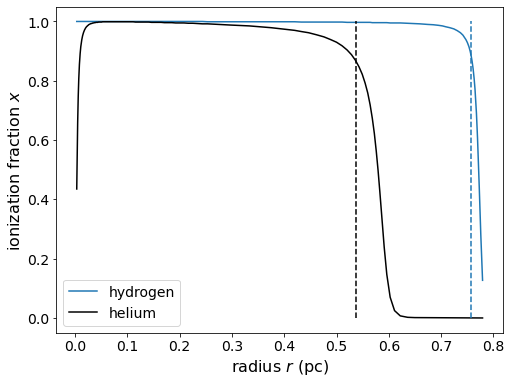

In [15]:
# FILL IN YOUR VALUES FOR RSTROM HERE
rstrom_H =  r_st_hydrogen # change this to your calculated value for Hydrogen above
rstrom_He = r_st_helium # change this to your calculated value for Helium above

# load Cloudy output data
r,xH,xHe,xHe2 = np.load('cloudy_hii_example_Rx.npy')

# make a plot of ionization fractions
plt.figure(figsize=(8,6))
plt.plot(r/3.09e18,xH,label='hydrogen',color='C0')
plt.plot(r/3.09e18,xHe,label='helium',color='k')
plt.plot(rstrom_H/3.09e18+np.zeros(50),np.arange(50)/49.,color='C0',linestyle='--')
plt.plot(rstrom_He/3.09e18+np.zeros(50),np.arange(50)/49.,color='k',linestyle='--')
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlabel('radius $r$ (pc)',fontsize=16); plt.ylabel(r'ionization fraction $x$',fontsize=16)
plt.legend(frameon=True,fontsize=14)

### 6. Nebular spectrum

Cloudy also calculates the observed spectrum from the nebula, including both the initial stellar spectrum (here a Planck spectrum $B_\nu (T)$ with $T = 3\times10^4$ K) and the additional radiation from the ionized gas in the nebula.

What are the major differences between the incident (stellar) spectrum, and the observed one from the entire nebula? Why is the high energy flux of the star greatly reduced in the observed spectrum? Where did that energy go?

Comment on any radiation processes (emission or absorption) that you think might be contributing to the shape of the observed nebula spectrum.


In [38]:
#get the emission freqs
def emission_freq(ionization_energy):
    """
    ionization energy in eV
    """
    #constants and conversions:
    h = 6.626e-27 # erg s
    erg_per_eV = 1.602e-12 # erg per eV
    c = 2.998e10 #cm s^-1
    angstrom_per_cm = 10e8

    ion_erg = ionization_energy*erg_per_eV # now in erg
    ion_freq = ion_erg/h # sec^-1
    ion_lambda = (c/ion_freq)*angstrom_per_cm # in angstrom

    return ion_freq, ion_lambda

hydrogen_nu, hydrogen_lambda = emission_freq(13.6)
helium_nu, helium_lambda = emission_freq(24.6)

print(f'Ionization Frequency H: {hydrogen_nu:.2e} Hz, Ionization Frequency Helium: {helium_nu:.2e} Hz')

Ionization Frequency H: 3.29e+15 Hz, Ionization Frequency Helium: 5.95e+15 Hz


(1000000000000.0, 2e+16)

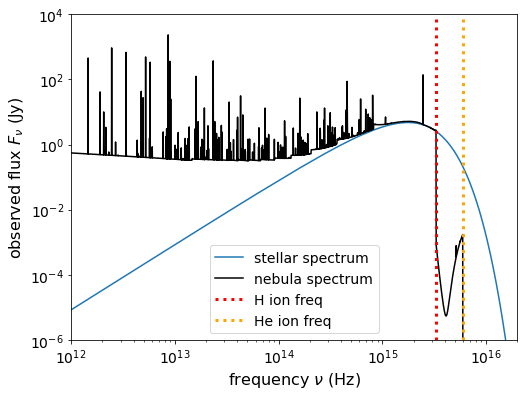

In [39]:
# load Cloudy output data
nu,Fnu_trans,Fnu_diff,Fnu_inc = np.load('cloudy_hii_example_spec.npy')

# make a plot of the stellar (blue) and observed (black) spectra
# include ionization frequencies for H and He
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.loglog(nu,Fnu_inc,label='stellar spectrum',color='C0')
ax.loglog(nu,Fnu_trans,label='nebula spectrum',color='k')

ax.axvline(hydrogen_nu, color='red', ls=':', lw=3, label='H ion freq')
ax.axvline(helium_nu, color='orange', ls=':', lw=3, label='He ion freq')

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel(r'frequency $\nu$ (Hz)',fontsize=16); ax.set_ylabel(r'observed flux $F_\nu$ (Jy)',fontsize=16)
ax.legend(frameon=True,fontsize=14)
ax.set_ylim(1e-6,1e4); ax.set_xlim(1e12,2e16)

__What are the major differences between the incident (stellar) spectrum, and the observed one from the entire nebula?__

>Stellar spectrum shows no spectral features beyond having shape of a Planck curve -- because it was generated by formula rather than observed.  It shows a peak flux at approximately $\nu = 2\times10^{15}\ Hz$ and drops off rapidly (Wein Tail) there after.

>The nebula spectrum shows many emission lines below $\nu = 10^{15}\ Hz$, and a large absorption line at the ionization frequency of Hydrogen: $\nu = 3.29\times 10^{15} Hz$.


__Why is the high energy flux of the star greatly reduced in the observed spectrum? Where did that energy go?__

>The star is emitting photons at the Hydrogen ionization frequency -- the star's peak flux is near the ionization frequency. These photons are absorbed by the surrounding cloud (the nebula) as evidenced by the absorption line in the figure.   These photons excite (heat up) the other particles in the gas causing them to emit their own photons at their respective quantum frequencies. The figure suggests the cloud is made up largely of hydrogen (the large absorption line), some helium (somewhat large emission line at the He emission frequency) and a small proportion of metals (small-ish emission lines at lower frequencies).

__Comment on any radiation processes (emission or absorption) that you think might be contributing to the shape of the observed nebula spectrum.__

> The width of the absorption feature near the Hydrogen ionization frequency that the nebula is in a highly turbulent state.